# Meta-learning algorithms

In [31]:
# Import libraries 
import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn.datasets as ds          # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv   # Pel Cross-validation
import sklearn.neighbors as nb         # Per fer servir el knn

from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [32]:
data = pd.read_csv('fake_job_preprocessed.csv')
data

,title,location,department,salary_range,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6.333616e-09,0.041026,0.000000e+00,2.222222e-02,0.000051,0.056281,0.056281,0,1,0,0.166667,0.068627,0.102041,4.431315e-03,0.017964,0
1,3.003079e-01,0.380666,6.413994e-02,5.628121e-02,0.144389,0.056281,0.015136,0,0,0,0.041833,0.039746,0.012579,3.703704e-02,0.032536,0
2,5.628121e-02,0.000000,5.628121e-02,1.513635e-02,0.015136,0.056281,0.056281,0,1,1,0.050260,0.030513,0.027523,0.000000e+00,0.019231,0
3,1.513635e-02,0.002669,6.413994e-02,1.160042e-10,0.144389,0.056281,0.056281,0,0,0,0.050260,0.030513,0.017430,1.732102e-02,0.015110,0
4,5.628121e-02,0.000003,3.430079e-02,1.391622e-04,0.015136,0.056281,0.056281,0,1,1,0.050260,0.145455,0.017430,7.816336e-13,0.017516,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,5.628121e-02,0.003155,3.430079e-02,3.153322e-10,0.000019,0.056281,0.056281,0,1,1,0.050260,0.132733,0.017430,1.911765e-01,0.017516,0
5202,3.806656e-01,0.056281,3.430079e-02,3.003079e-01,0.144389,0.056281,0.380666,0,1,0,0.050260,0.132733,0.065969,1.276596e-01,0.017516,0
5203,0.000000e+00,0.021277,2.272727e-02,0.000000e+00,0.000377,0.056281,0.000377,0,1,0,0.050260,0.039746,0.017430,1.879699e-03,0.000000,0
5204,6.944797e-06,0.057692,1.391622e-04,3.749082e-17,0.144389,0.002669,0.002669,0,0,0,0.050260,0.030513,0.017430,4.431315e-03,0.015110,0


In [33]:
X = data.values[:, 0:data.shape[1]-1]
y = data.values[:, data.shape[1]-1]

# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.33, random_state=1)

### Majority voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC

# parametros DT
BestPar = {'splitter': 'best', 'min_samples_split': 5, 'max_features': 7, 'max_depth': 5, 'criterion': 'entropy'}

# Crear lista de modelos
modelos = [('nb', GaussianNB()), 
           ('knn', nb.KNeighborsClassifier(n_neighbors=5)),
           ('dt', tree.DecisionTreeClassifier(criterion=BestPar['criterion'], max_depth=BestPar['max_depth'],
                                max_features=BestPar['max_features'],
                                min_samples_split=BestPar['min_samples_split'], splitter=BestPar['splitter'])),
            ('svc', SVC(kernel='linear', C=100))]

# Instanciar el VotingClassifier
votacion_mayoria = VotingClassifier(estimators=modelos, voting='hard')

# Comprovamos valores
scores = cross_val_score(votacion_mayoria, X, y, cv=10, scoring='f1')
print("f1: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

f1: 0.866 [Majority Voting]


### Majority voting (weighted voting)

In [26]:
import warnings
warnings.filterwarnings("ignore")

# Instanciar el VotingClassifier
votacion_mayoria = VotingClassifier(estimators=modelos, voting='hard', weights=[2,1,2,2])

# Comprovamos valores
scores = cross_val_score(votacion_mayoria, X, y, cv=10, scoring='f1')
print("f1-score: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

f1: 0.875 [Weighted Voting]


### Bagging

In [37]:
from sklearn.ensemble import BaggingClassifier

lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest), X, y, cv=10, scoring='f1')
    print("f1: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

f1: 0.824 [1]
f1: 0.829 [2]
f1: 0.881 [5]
f1: 0.879 [10]
f1: 0.877 [20]
f1: 0.882 [50]
f1: 0.888 [100]
f1: 0.884 [200]


In [42]:
lb2=[]    
print()
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.75), X, y, cv=10, scoring='f1')
    print("f1: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())


f1: 0.792 [1]
f1: 0.772 [2]
f1: 0.848 [5]
f1: 0.867 [10]
f1: 0.874 [20]
f1: 0.892 [50]
f1: 0.883 [100]
f1: 0.891 [200]


### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=10, scoring='f1')
    print("f1-score: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

f1-score: 0.765 [1]
f1-score: 0.769 [2]
f1-score: 0.851 [5]
f1-score: 0.874 [10]
f1-score: 0.879 [20]
f1-score: 0.888 [50]
f1-score: 0.878 [100]
f1-score: 0.883 [200]


### Adaboost

In [45]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=10, scoring='f1')
    print("f1: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

f1: 0.412 [1]
f1: 0.423 [2]
f1: 0.708 [5]
f1: 0.836 [10]
f1: 0.869 [20]
f1: 0.881 [50]
f1: 0.881 [100]
f1: 0.874 [200]


In [46]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=10, scoring='f1')
    print("f1: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

f1: 0.812 [1]
f1: 0.825 [2]
f1: 0.866 [5]
f1: 0.886 [10]
f1: 0.886 [20]
f1: 0.887 [50]
f1: 0.895 [100]
f1: 0.895 [200]


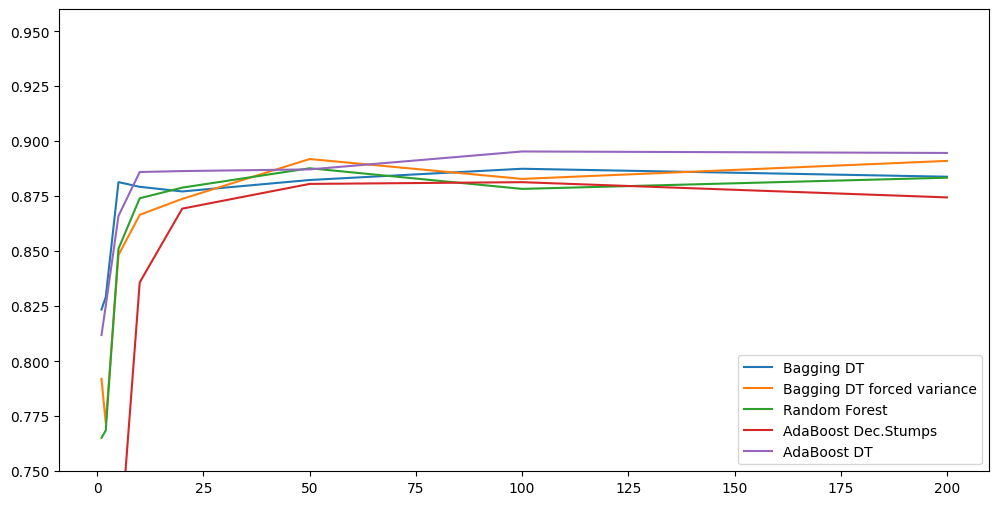

In [55]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.legend(loc='lower right')

plt.ylim(0.75,0.96)

plt.savefig('performance_metas.png')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=91572d65-ca52-49ec-8072-8fb246390be4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>